In [49]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator

This function makes nice $\LaTeX$ labels for different final states

In [50]:
def get_tex_label(label):
    tex_label = r"$"+ label
    tex_label = tex_label.replace("pi0", "\pi^0")
    tex_label = tex_label.replace("pi pi", "\pi^+ \pi^-")
    tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
    tex_label = tex_label.replace("g", "\gamma")
    tex_label = tex_label.replace("e e", "e^+ e^-")
    tex_label = tex_label.replace("s s", "S S")
    return tex_label + r"$"

## Branching fractions as a function of $g_{S \chi \chi}$ and $g_{Sff}$

First, create an array with 500 logarithmically spaces values of $g_{Sff}/g_{S\chi\chi}$ to scan over:

In [40]:
ratio_min, ratio_max, n_ratios = 1e-1, 1e10, 500
ratios = np.logspace(np.log10(ratio_min), np.log10(ratio_max), n_ratios)

In [41]:
sm_args = {"mx": 250., "ms": 200., "gsxx": 1., "gsff": 1., "gsGG": 0.0000001, "gsFF": 0.}
sm = ScalarMediator(**sm_args)

Now we compute the branching fractions for each value of $g_{Sff} / g_{s\chi\chi}$. To avoid dividing by zero, it's necessary to give the DM a small amount of kinetic energy by setting its velocity equal to the usual $10^{-3}c$. We store the dictionaries returned by `branching_fractions()` in the list `bfs_raw`.

In [42]:
vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions, vev for different couplings
bfs_raw = []
vss = []
for ratio in ratios:
    sm.gsff = sm.gsxx * ratio
    vss.append(sm.vs)
    bfs_raw.append(sm.branching_fractions(2. * sm.mx * (1. + 0.5 * vx_mw)))
    
vss = np.array(vss)

This turns our list of dictionaries of branching fractions into a dictionary of lists of branching fractions:

In [43]:
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

Finally, we iterate over the final states to which $S$ has nonzero couplings and plot their branching fractions.

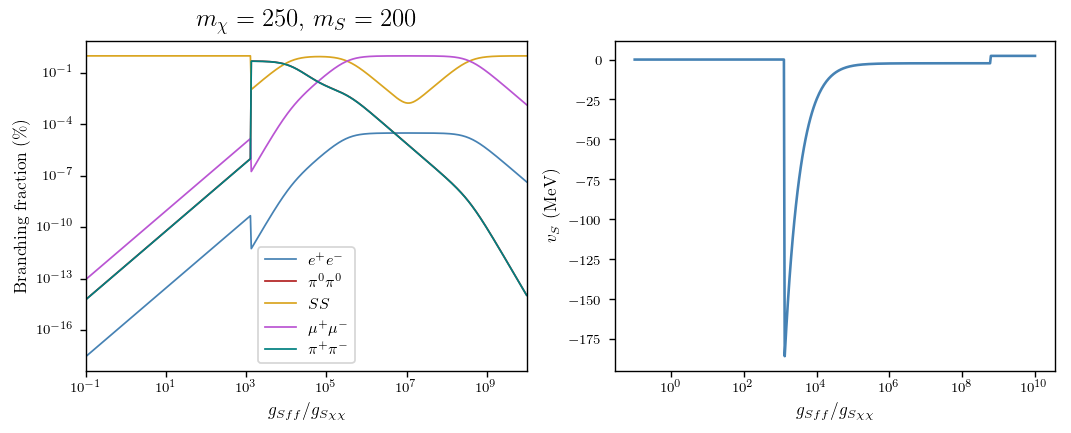

In [44]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)

for fs, bf_list in bfs.iteritems():
    if fs != "g g":
        plt.plot(ratios, bf_list, label=get_tex_label(fs), linewidth=1)

plt.xscale("log")
plt.yscale("log")
plt.title(r"$m_\chi = %.0f$, $m_S = %.0f$" % (sm.mx, sm.ms))
plt.xlabel(r"$g_{Sff} / g_{S\chi\chi}$")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(ratios[[0, -1]])

plt.subplot(1, 2, 2)

plt.plot(ratios, vss)
plt.xscale("log")
plt.xlabel(r"$g_{Sff} / g_{S\chi\chi}$")
plt.ylabel(r"$v_S$ (MeV)")

# plt.text(-2, 1e-5, "Preliminary", color="r", alpha=0.3, fontsize=40, rotation=-10)

# plt.savefig("figures/scalar_branching_fractions.pdf")

## Branching fractions as a function of $g_{SGG}/g_{Sff}$

(-1.0, 3.0)

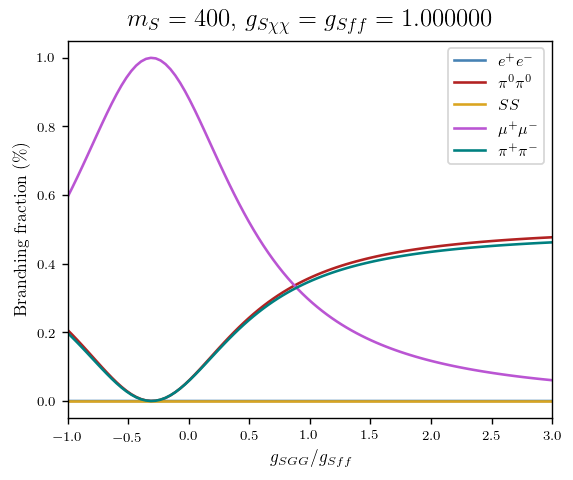

In [78]:
ratio_min, ratio_max, n_ratios = -1, 3, 100
ratios = np.linspace(ratio_min, ratio_max, n_ratios)

sm_args = {"mx": 250., "ms": 400., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 0.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

# Compute branching fractions for different couplings
bfs_raw = []
for r in ratios:
    sm.gsGG = r * sm.gsff
    e_cm = 2. * sm.mx * (1. + 0.5 * vx_mw)
    bfs_raw.append(sm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

### Make the plot
plt.figure(figsize=(5, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "g g":
        plt.plot(ratios, bf_list, label=get_tex_label(fs))

plt.title("$m_S = %.0f$, $g_{S\chi\chi} = g_{Sff} = %f$" % (sm.ms, sm.gsff))
plt.xlabel(r"$g_{SGG} / g_{Sff}$")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(ratios[[0, -1]])
# plt.ylim(1e-1, 1.1)

# plt.text(-2, 1e-5, "Preliminary", color="r", alpha=0.3, fontsize=40, rotation=-10)

# plt.savefig("figures/scalar_branching_fractions.pdf")

In [79]:
(137/105.)**2

1.702403628117914

In [67]:
np.sqrt(1.0 + 4. * sm.gsGG * sm.vs / 9. / (246.*1e3))

0.9999999999673315

## Branching fractions as a function of $m_\chi$

(0.1, 1.1)

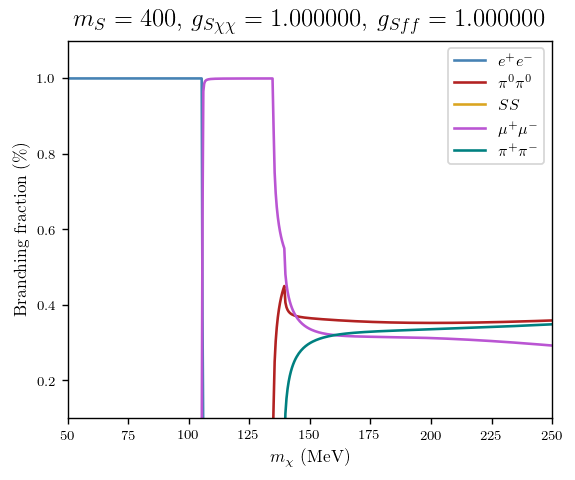

In [60]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

sm_args = {"mx": 250., "ms": 400., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 0.}
sm = ScalarMediator(**sm_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    sm.mx = mx
    e_cm = 2. * sm.mx * (1. + 0.5 * vx_mw)
    bfs_raw.append(sm.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in sm.list_final_states()}

### Make the plot
plt.figure(figsize=(5, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "g g":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("$m_S = %.0f$, $g_{S\chi\chi} = %f$, $g_{Sff} = %f$" % (sm.ms, sm.gsxx, sm.gsff))
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel("Branching fraction (\%)")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(1e-1, 1.1)

# plt.text(-2, 1e-5, "Preliminary", color="r", alpha=0.3, fontsize=40, rotation=-10)

# plt.savefig("figures/scalar_branching_fractions.pdf")

In [47]:
from hazma.parameters import (charged_pion_mass as mpi, vh)

In [48]:
mpi/vh

0.0005668332128826155